# 3 Робота з даними

## 3.1 Перевірка даних

### Імпортуємо пакет pandas, завантажимо дані в датафрейм, виводимо інформацію про нього. Видалимо колонку id за допомогою методу pandas.Dataframe.drop, передавши в нього список з єдиним елементом id та параметром за замовчуванням inplace=True, щоб зміна відбулася в самому датафреймі, а не видало новий. Додатково імпортуємо модулі matplotlib.pyplot та seaborn для відображення графіків.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/cardio_train.csv', sep=';')
df.drop(['id'], axis=1, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


*Завантажений датафрейм*

In [3]:
df.isna().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

*Колонки, де всі значення ініціалізовані*

## Вибір ознак для аналізу

### Побудуємо матрицю кореляції та визначимо, наскільки кожен фактор впливає на якість води. Для цього імпортуємо модуль seaborn та застосуємо функцію heatmap, де передаємо йому вище зазначену матрицю, використавши pandas.Dataframe.corr метод датафрейму. 

<AxesSubplot: title={'center': 'Кореляція між факторами'}>

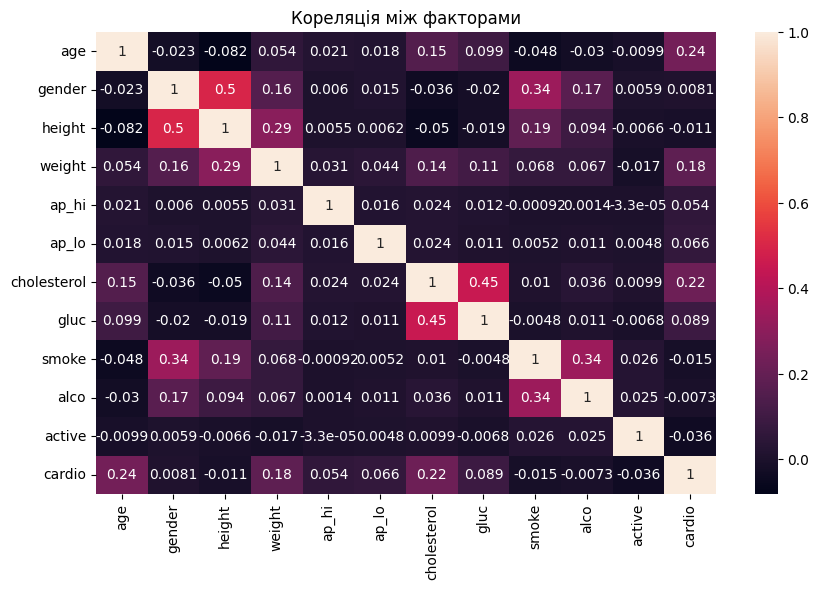

In [4]:
import seaborn as sns
fig, axis = plt.subplots(figsize=(10, 6))
axis.set_title('Кореляція між факторами')
sns.heatmap(df.corr(), ax=axis, annot=True)

*Матриця кореляцій*

### Бачимо, що найбільше на виникнення серцево-судинних захворювань впливає вік, вага, холестирол. Доволі цікавим фактами є кореляція між віком та холестиролом, статтю та курінням, статтю та алкоголем, холестиролом та глюкозою. Залежність між статтю та вагою і висотою доволі очевидна, що пояснюється звичайною різницею у фізичних показниках між чоловіком та жінокю. Зобразимо статистику факторів та винекненням захворювання, розділену за статтю. За допомогою функції seaborn.FacetGrid згрупуємо значення та за допомогою seaborn.histplot зобразимо їх у вигляді гістограми. Побудуємо статистику за віком.

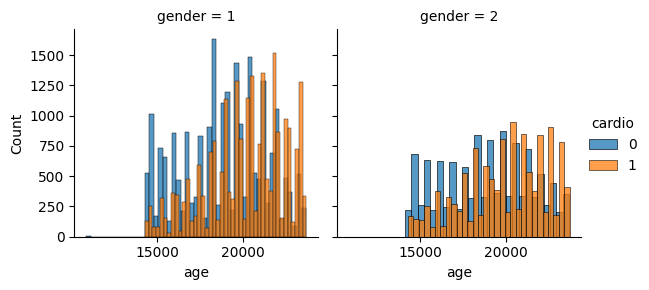

In [5]:
def plot_stat(factor: str):
    g = sns.FacetGrid(df[['gender', 'cardio'] + [factor]], col='gender', hue='cardio')
    g.map(sns.histplot, factor)
    g.add_legend()
plot_stat('age')

*Статистика захворювання від віку між чоловіками та жінками*

### Зобразимо статистику за вагою.

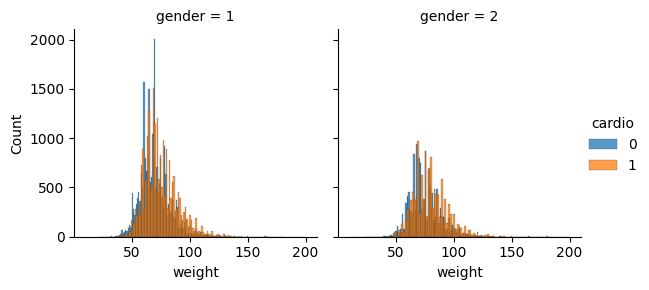

In [6]:
plot_stat('weight')

*Статистика захворювання від ваги між чоловіками та жінками*

### Зобразимо статистику за холестиролом.

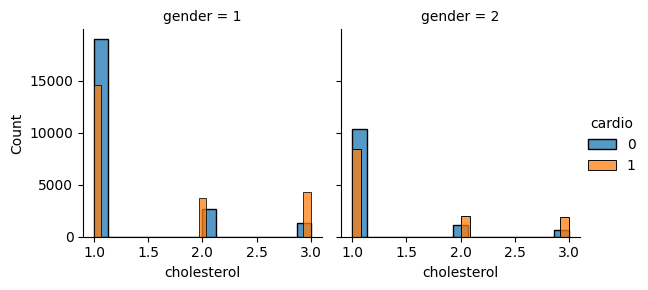

In [7]:
plot_stat('cholesterol')

*Статистика захворювання від холестиролу між чоловіками та жінками*

## Поділ даних

### Для збільшення якості моделі залишимо лише чотири колонки: age, weight, cholesterol, cardio.

In [10]:
df = df[['age', 'weight', 'cholesterol', 'cardio']]
df

,age,weight,cholesterol,cardio
0,18393,62.0,1,0
1,20228,85.0,3,1
2,18857,64.0,3,1
3,17623,82.0,1,1
4,17474,56.0,1,0
...,...,...,...,...
69995,19240,76.0,1,0
69996,22601,126.0,2,1
69997,19066,105.0,3,1
69998,22431,72.0,1,1


*Відфільтрований датафрейм*

### Ділимо дані на тренувальні та тестові для подальшох роботи. Імпортуємо модуль sklearn.model_selection та застосуємо функцію train_test_split. Розділимо набір даних на 80% навчальних та 20% тестових.

In [14]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=0)

*Поділ інформації на інформацію та результат*